<a href="https://colab.research.google.com/github/pymacbit/ML-Colab-Book/blob/master/Data%20Analysis/EDA%20Use%20Cases/911%20Calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of 911 Calls

In [1]:
!gdown --id 1hfT6f4ptZ4Dg8Uhy1uXytTxUf0Ho1uO4 --output 911.csv

Downloading...
From: https://drive.google.com/uc?id=1hfT6f4ptZ4Dg8Uhy1uXytTxUf0Ho1uO4
To: /content/911.csv
18.4MB [00:00, 69.6MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (6, 4)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Reading the data
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Start with Basic Analysis

In [5]:
# Let's check out the top 5 zipcodes for calls.

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# The top townships for the calls were as follows:

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# For 90k + entries, how many unique call titles did we have? 

df['title'].nunique()

110

### Data Wrangling for Feature Creation

We can extract some generalised features from the columns in our dataset for further analysis. 

In the _title_ column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon). 

The timestamp column can be further segregated into Year, Month and Day of Week too. 

Let's start with creating a 'Reason' feature for each call.

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


### Now, let's find out the most common reason for 911 calls, according to our dataset.

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

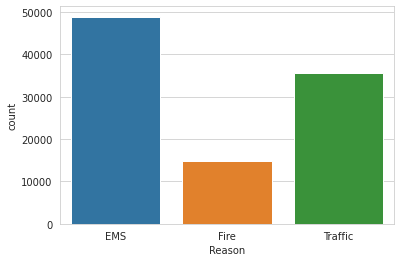

In [10]:
sns.countplot(df['Reason'])

In [11]:
# Let's deal with the time information we have. 
# Checking the datatype of the timestamp column.
type(df['timeStamp'][0])

str

As the timestamps are still string types, it'll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively. 

In [0]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
# For a single DateTime object, we can extract information as follows.

time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


In [14]:
# let's create new features for the above pieces of information.

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


The Day of the Week is an integer and it might not be instantly clear which number refers to which Day. We can map that information to a Mon-Sun string.

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

df.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,8,Wed


Let's combine the newly created features, to check out the most common call reasons based on the day of the week.

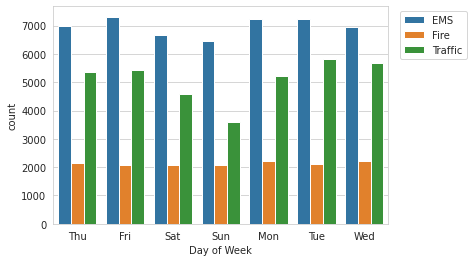

In [16]:
sns.countplot(df['Day of Week'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also iteresting is that Emergency Service related calls are also low during the weekend.

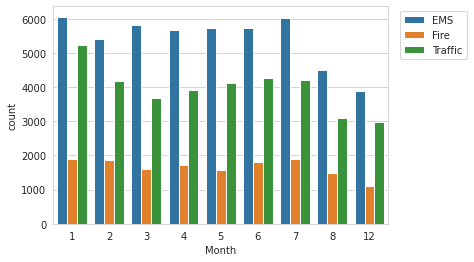

In [17]:
sns.countplot(df['Month'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

Now, let's check out the relationship between the number of calls and the month.

Text(0, 0.5, 'Number of Calls')

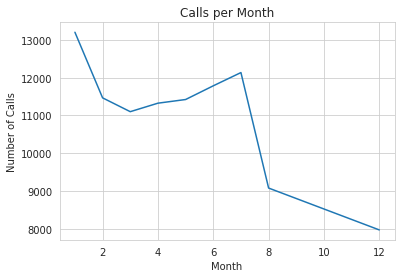

In [18]:
byMonth = df.groupby(by='Month').count()

byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

Using seaborn, let's fit the number of calls to a month and see if there's any concrete correlation between the two.

Text(-8.825000000000003, 0.5, 'Number of Calls')

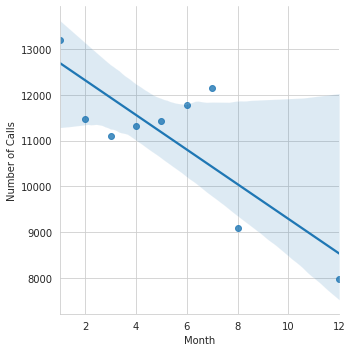

In [19]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='Month',y='e',data=byMonth)
plt.ylabel('Number of Calls')

### So, it does seem that there are fewer emergency calls during the holiday seasons.

Let's extract the date from the timestamp, and see behavior in a little more detail.

In [20]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


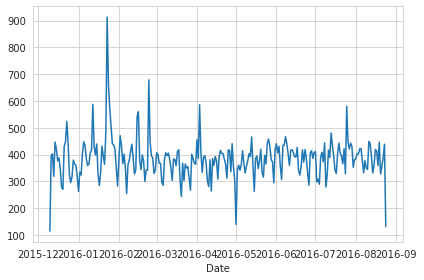

In [21]:
# Grouping and plotting the data: 
    
df.groupby('Date').count()['e'].plot.line(y='e')

plt.legend().remove()
plt.tight_layout()

In [22]:
# We can also check out the same plot for each reason separately.

df.groupby('Reason'=='Traffic','Date').count().plot.line(y='e')
plt.title('Traffic')
plt.legend().remove()
plt.tight_layout()

ValueError: ignored

In [23]:
df.groupby([['Reason']=='Fire'],'Date').count().plot.line(y='e')
plt.title('Fire')
plt.legend().remove()
plt.tight_layout()

ValueError: ignored

In [24]:
pd.groupby(df[df['Reason']=='EMS'],'Date').count().plot.line(y='e')
plt.title('EMS')
plt.legend().remove()
plt.tight_layout()

AttributeError: ignored

Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [25]:
day_hour = df.pivot_table(values='lat',index='Day of Week',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

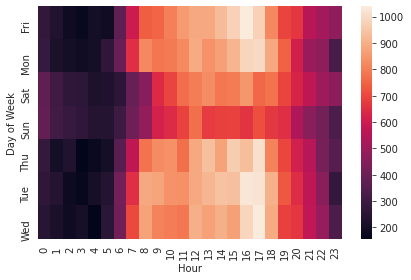

In [26]:
sns.heatmap(day_hour)

plt.tight_layout()

### We see that most calls take place around the end of office hours on weekdays. We can create a clustermap to pair up similar Hours and Days.

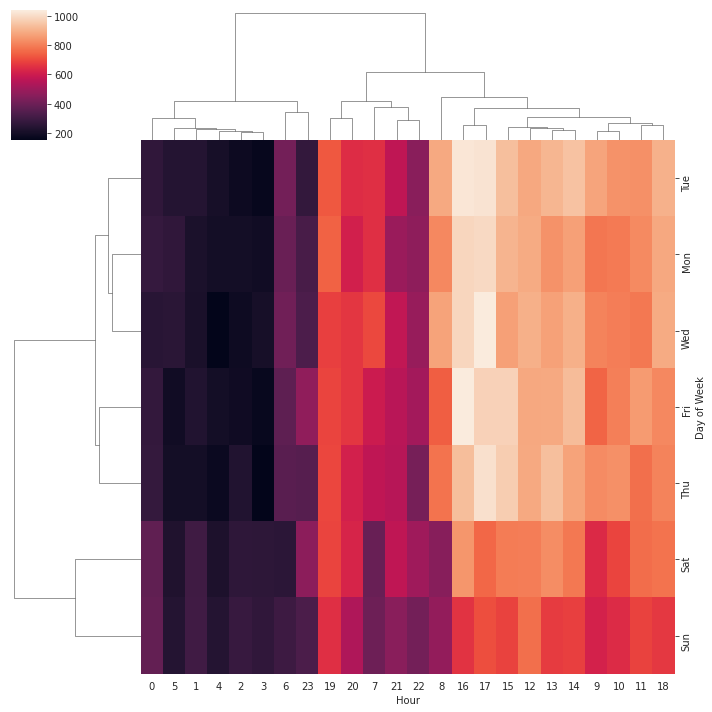

In [27]:
sns.clustermap(day_hour)